In [15]:
# Pour faire apparaître les graphes sous forme d'images .png dans le notebook
%matplotlib inline
import csv
import numpy as np
from scipy.signal import *
from numpy.fft import *
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14}) # pour augmenter la taille de caractère dans les graphiques
from ipywidgets import * # Pour insérer des widgets (éléments graphiques) dans le notebook
# Attention! Installer scikit-learn pour avoir accès aux algorithmes de classification
# Installer version 0.20 au plus récente (0.22.1) pour avoir accès à la nouvelle fonction tree.plot_tree()
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier # Méthode KNN
from pandas import * # Structures de données
from sklearn.naive_bayes import GaussianNB
from scipy.ndimage import interpolation, median_filter

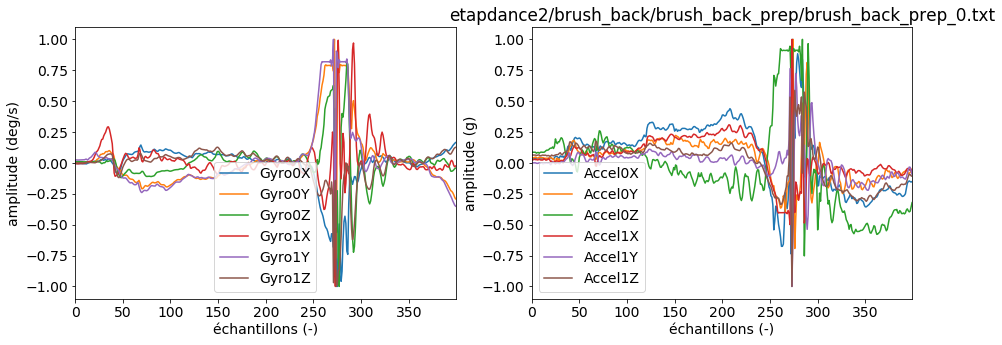

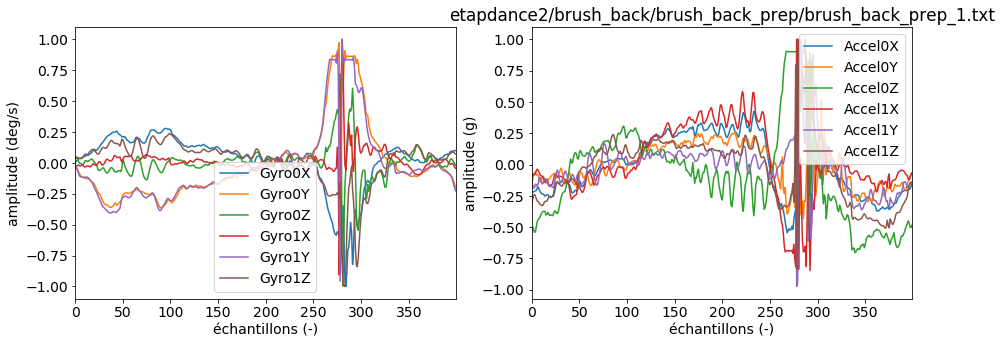

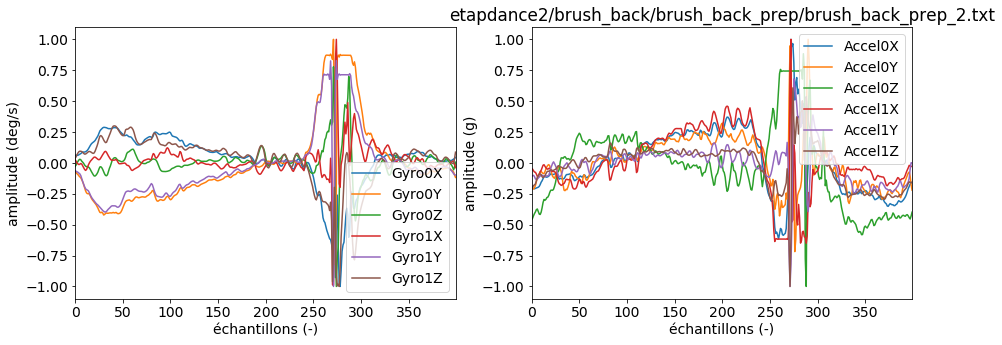

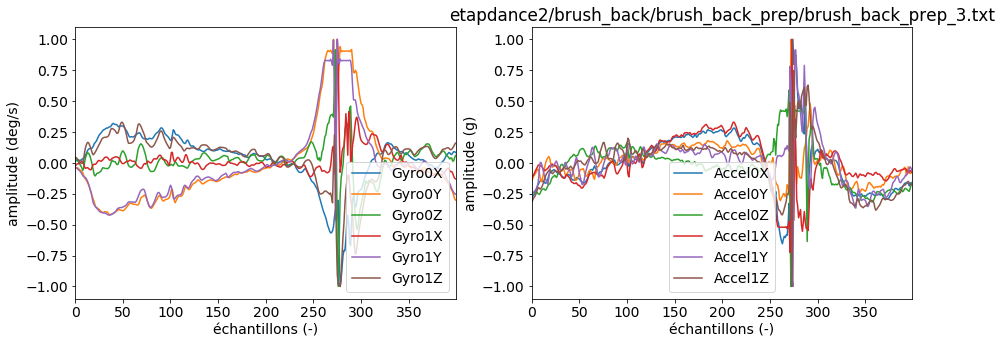

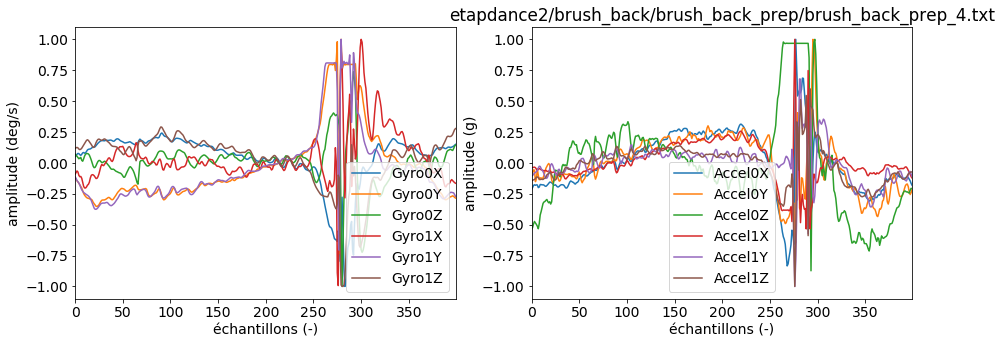

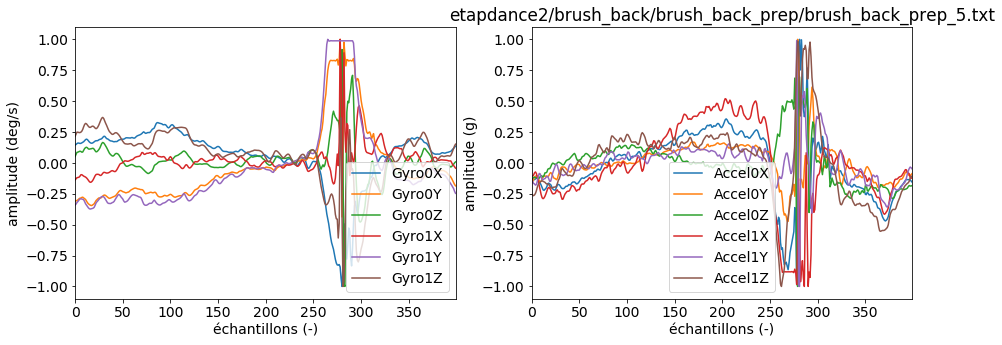

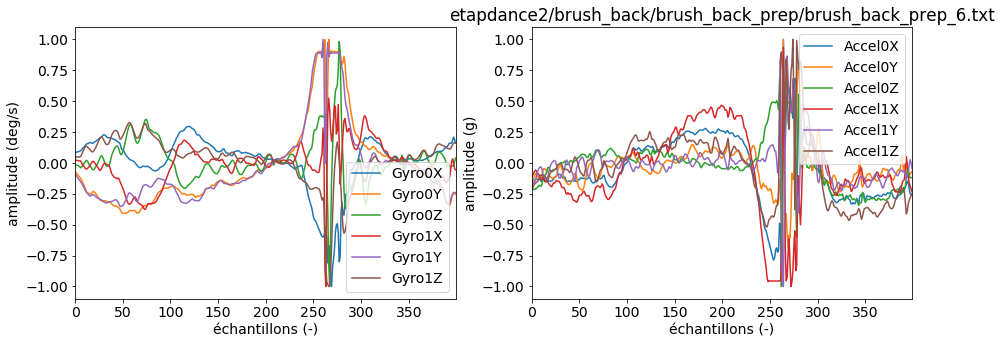

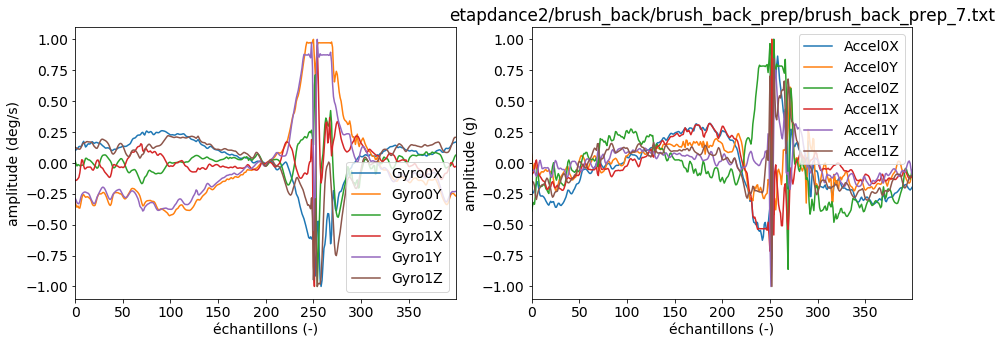

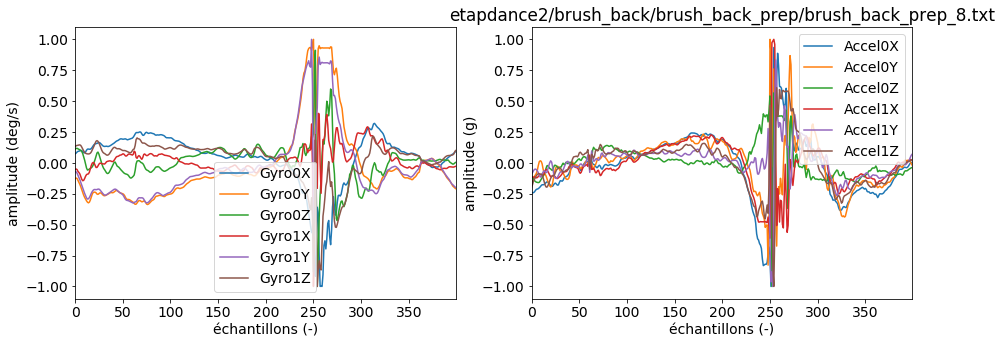

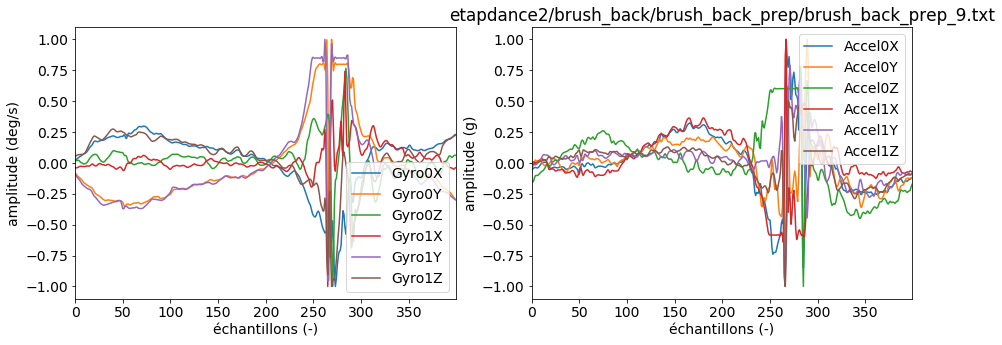

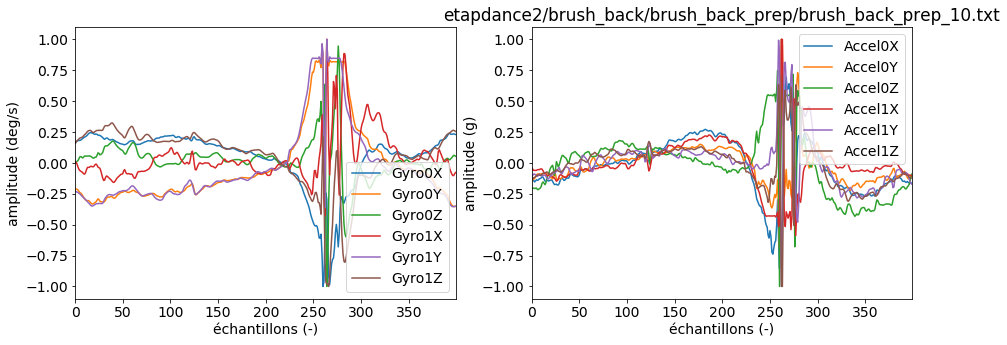

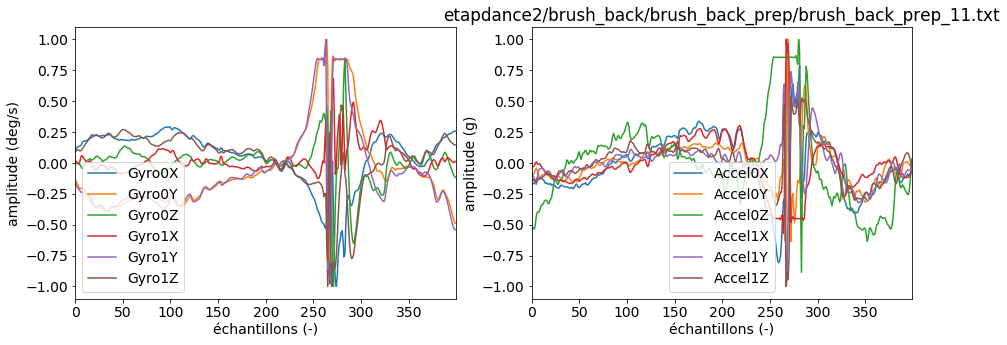

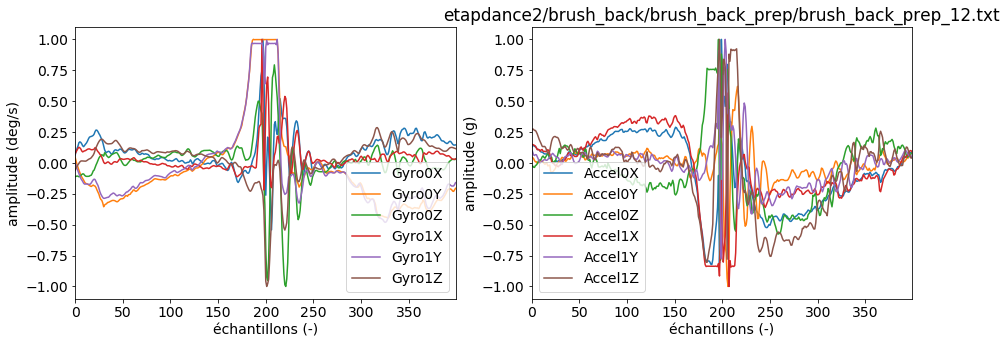

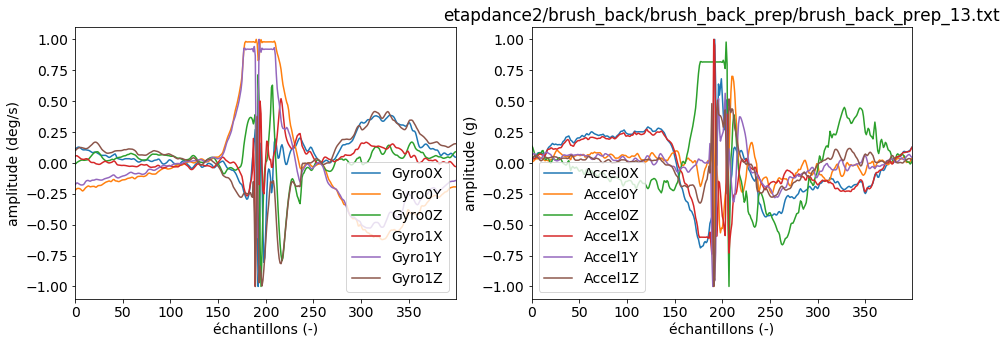

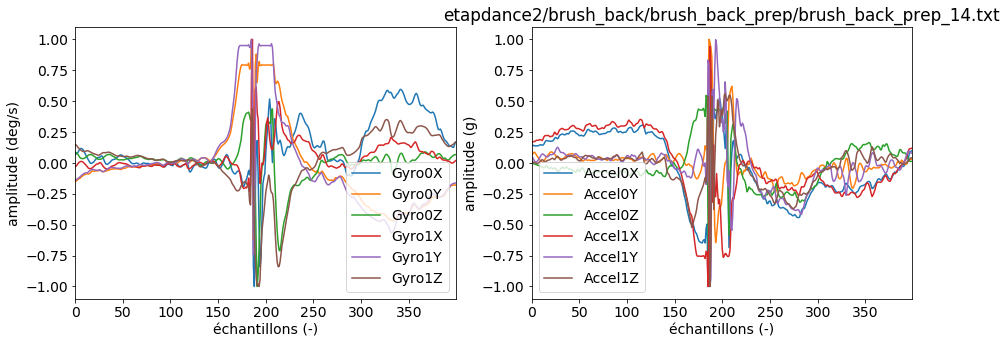

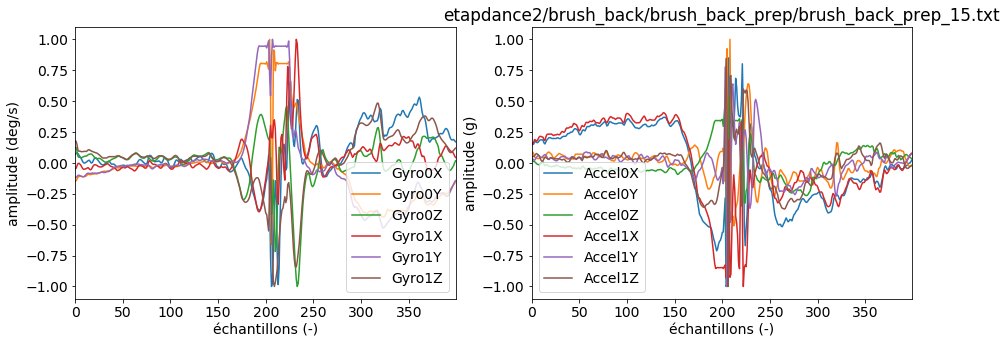

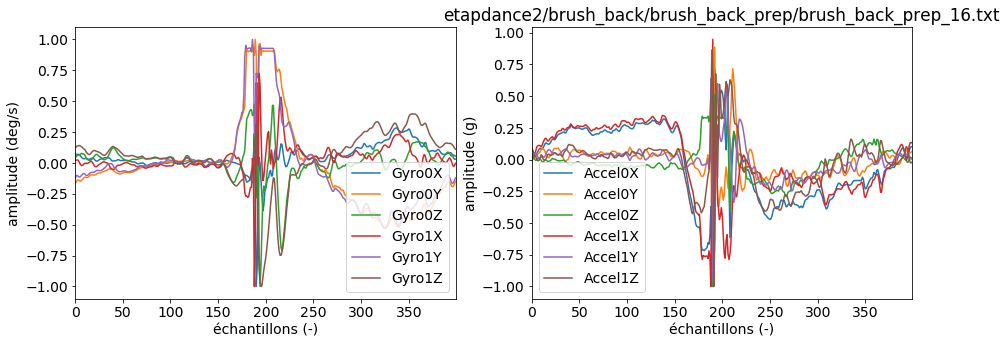

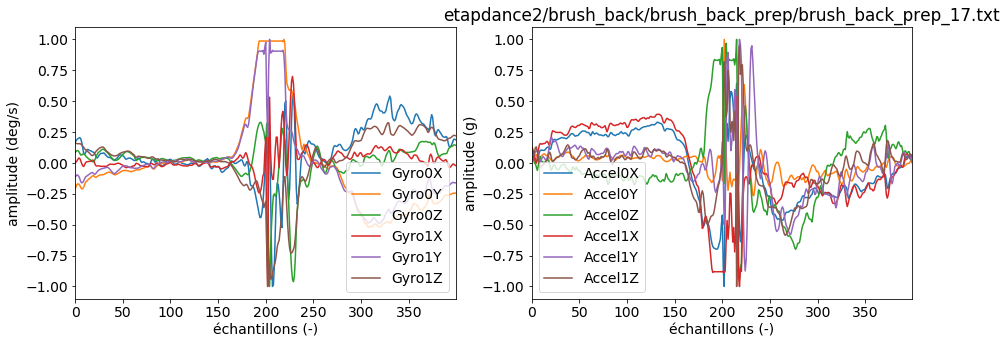

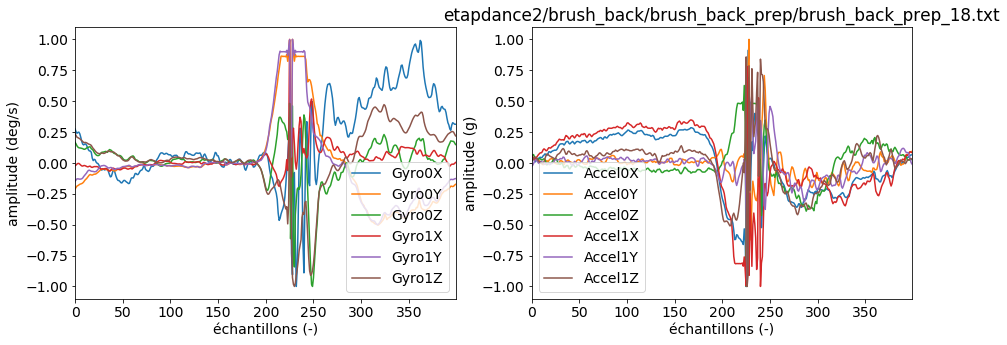

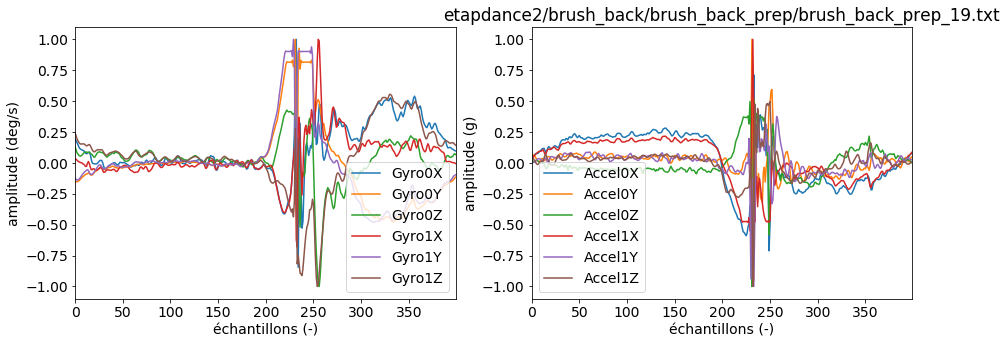

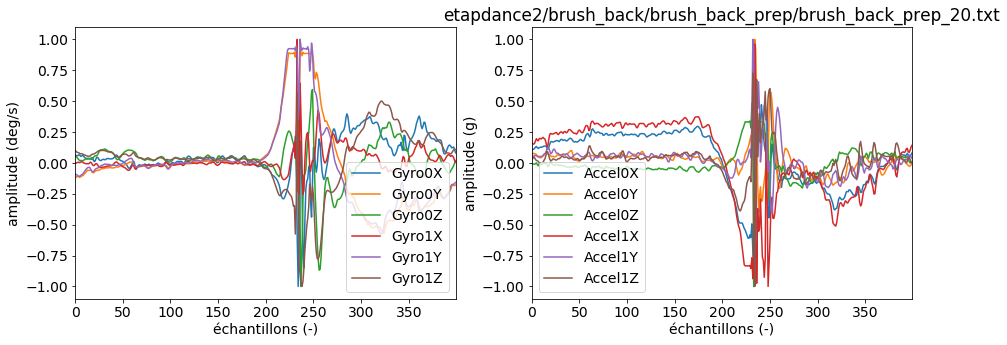

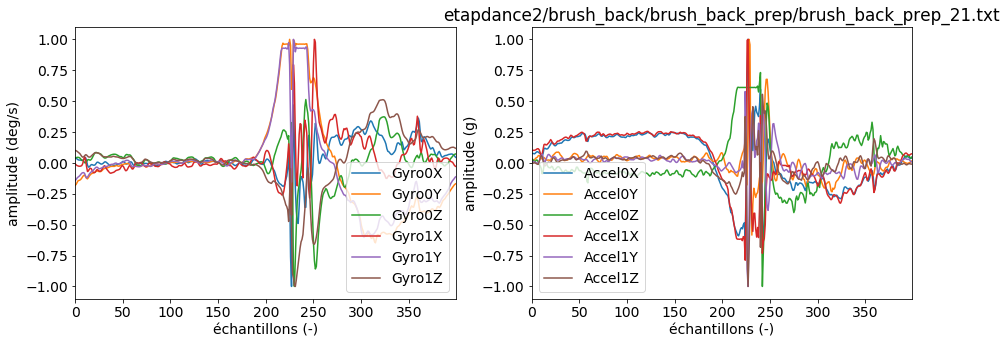

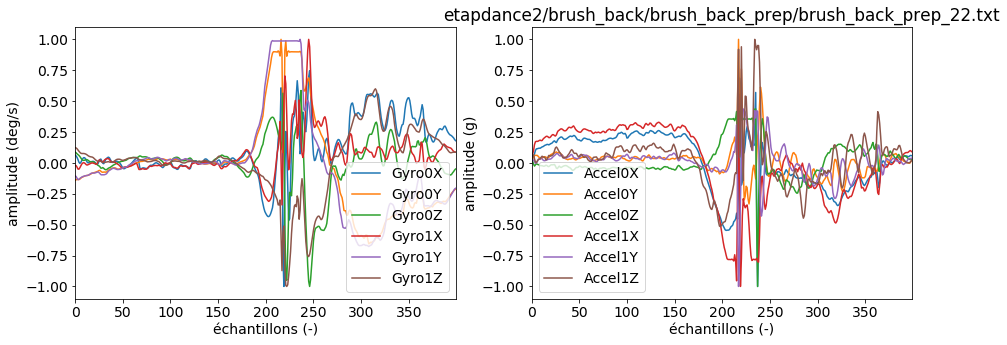

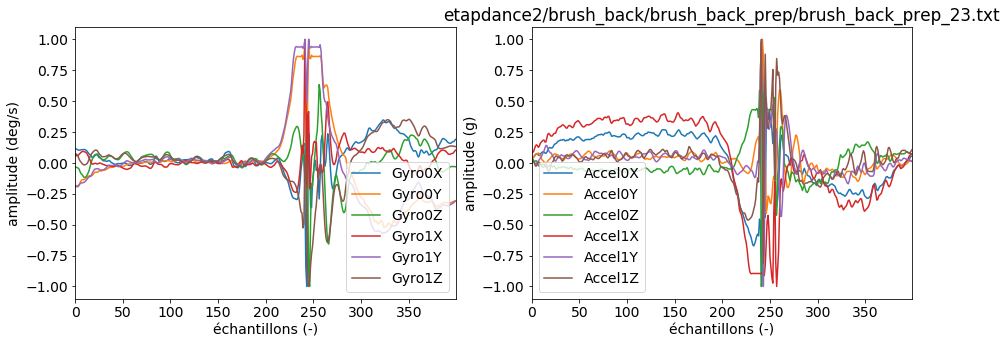

In [37]:
#dimensions graphiques
largeur=15
hauteur=5

step_type = "/brush_back"

path =  "etapdance2" + step_type + step_type + "_prep" + step_type + "_prep_"


size = 23

for n in range(size+1):
    step_type_nb = str(n)
    ext = ".txt"
    data_input = path + step_type_nb + ext

    data_raw = pandas.read_csv(data_input,names=['Gyro0X (deg)','Gyro0Y (deg)','Gyro0Z (deg)','Accel0X (g)','Accel0Y (g)','Accel0Z (g)','Gyro1X (deg)','Gyro1Y (deg)','Gyro1Z (deg)','Accel1X (g)','Accel1Y (g)','Accel1Z (g)'], dtype='a') 
    
        # MPU0 6050 (talon)
    Gyro0X = np.array(data_raw['Gyro0X (deg)'])[1:].astype(float)
    Gyro0Y = np.array(data_raw['Gyro0Y (deg)'])[1:].astype(float)
    Gyro0Z = np.array(data_raw['Gyro0Z (deg)'])[1:].astype(float)

    Accel0X = np.array(data_raw['Accel0X (g)'])[1:].astype(float)
    Accel0Y = np.array(data_raw['Accel0Y (g)'])[1:].astype(float)
    Accel0Z = np.array(data_raw['Accel0Z (g)'])[1:].astype(float)

    # MPU1 6050 (pointe)
    Gyro1X = np.array(data_raw['Gyro1X (deg)'])[1:].astype(float)
    Gyro1Y = np.array(data_raw['Gyro1Y (deg)'])[1:].astype(float)
    Gyro1Z = np.array(data_raw['Gyro1Z (deg)'])[1:].astype(float)

    Accel1X = np.array(data_raw['Accel1X (g)'])[1:].astype(float)
    Accel1Y = np.array(data_raw['Accel1Y (g)'])[1:].astype(float)
    Accel1Z = np.array(data_raw['Accel1Z (g)'])[1:].astype(float)

    
    plt.figure(figsize=(largeur,hauteur))
    plt.subplot(1, 2, 1)
    plt.plot(Gyro0X,label ='Gyro0X')
    plt.plot(Gyro0Y,label ='Gyro0Y')
    plt.plot(Gyro0Z,label ='Gyro0Z')
    plt.plot(Gyro1X,label ='Gyro1X')
    plt.plot(Gyro1Y,label ='Gyro1Y')
    plt.plot(Gyro1Z,label ='Gyro1Z')
    plt.ylabel('amplitude (deg/s)')
    plt.xlabel('échantillons (-)')
    plt.autoscale(axis='x',tight=True);
    plt.legend()
    #plt.savefig(fname='couplage_AC_step.png')
    plt.subplot(1, 2, 2)
    plt.plot(Accel0X,label='Accel0X')
    plt.plot(Accel0Y,label='Accel0Y')
    plt.plot(Accel0Z,label='Accel0Z')
    plt.plot(Accel1X,label='Accel1X')
    plt.plot(Accel1Y,label='Accel1Y')
    plt.plot(Accel1Z,label='Accel1Z')
    plt.ylabel('amplitude (g)')
    plt.xlabel('échantillons (-)')
    plt.autoscale(axis='x',tight=True);
    plt.legend()
    #plt.savefig(fname='couplage_AC_step.png')
    plt.title(data_input)
    plt.show()

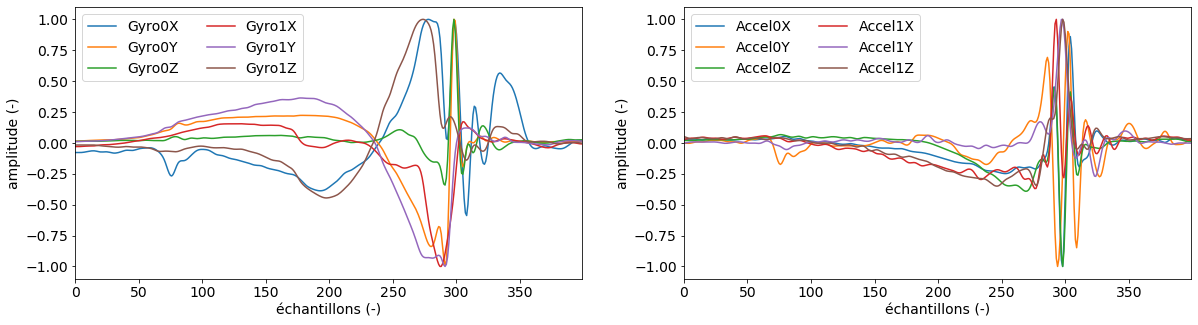

In [46]:
#dimensions graphiques
largeur=20
hauteur=5

step_type = 'heel'
ext = ".txt"
data_input =   "etapdance2" + "/" + step_type + "/" + step_type + "_prep_ex" +ext

data_raw = pandas.read_csv(data_input,names=['Gyro0X (deg)','Gyro0Y (deg)','Gyro0Z (deg)','Accel0X (g)','Accel0Y (g)','Accel0Z (g)','Gyro1X (deg)','Gyro1Y (deg)','Gyro1Z (deg)','Accel1X (g)','Accel1Y (g)','Accel1Z (g)'], dtype='a') 

    # MPU0 6050 (talon)
Gyro0X = np.array(data_raw['Gyro0X (deg)'])[1:].astype(float)
Gyro0Y = np.array(data_raw['Gyro0Y (deg)'])[1:].astype(float)
Gyro0Z = np.array(data_raw['Gyro0Z (deg)'])[1:].astype(float)

Accel0X = np.array(data_raw['Accel0X (g)'])[1:].astype(float)
Accel0Y = np.array(data_raw['Accel0Y (g)'])[1:].astype(float)
Accel0Z = np.array(data_raw['Accel0Z (g)'])[1:].astype(float)

# MPU1 6050 (pointe)
Gyro1X = np.array(data_raw['Gyro1X (deg)'])[1:].astype(float)
Gyro1Y = np.array(data_raw['Gyro1Y (deg)'])[1:].astype(float)
Gyro1Z = np.array(data_raw['Gyro1Z (deg)'])[1:].astype(float)

Accel1X = np.array(data_raw['Accel1X (g)'])[1:].astype(float)
Accel1Y = np.array(data_raw['Accel1Y (g)'])[1:].astype(float)
Accel1Z = np.array(data_raw['Accel1Z (g)'])[1:].astype(float)


plt.figure(figsize=(largeur,hauteur))
plt.subplot(1, 2, 1)
plt.plot(Gyro0X,label ='Gyro0X')
plt.plot(Gyro0Y,label ='Gyro0Y')
plt.plot(Gyro0Z,label ='Gyro0Z')
plt.plot(Gyro1X,label ='Gyro1X')
plt.plot(Gyro1Y,label ='Gyro1Y')
plt.plot(Gyro1Z,label ='Gyro1Z')
plt.ylabel('amplitude (-)')
plt.xlabel('échantillons (-)')
plt.autoscale(axis='x',tight=True);
plt.legend(loc='upper left',ncol=2)
plt.subplot(1, 2, 2)
plt.plot(Accel0X,label='Accel0X')
plt.plot(Accel0Y,label='Accel0Y')
plt.plot(Accel0Z,label='Accel0Z')
plt.plot(Accel1X,label='Accel1X')
plt.plot(Accel1Y,label='Accel1Y')
plt.plot(Accel1Z,label='Accel1Z')
plt.ylabel('amplitude (-)')
plt.xlabel('échantillons (-)')
plt.autoscale(axis='x',tight=True);
plt.legend(loc='upper left',ncol=2)
plt.savefig(fname=step_type + '_prep_ex.png')
plt.show()